In [2]:
filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/analysis_results/20200103_data_freeze/differentiation_trajectories/differentiation_efficiency_predictive_model_scores.tsv"

In [3]:
df = read.csv(filename, sep = "\t")
head(df)

donor_id,diff_efficiency,model_score
HPSI0114i-bezi_1,not_assessed,0.966477104
HPSI0114i-bezi_3,succeeded,0.986227207
HPSI0114i-eipl_1,failed,0.017594384
HPSI0114i-eipl_3,not_assessed,0.005949439
HPSI0114i-fikt_3,succeeded,0.972664000
HPSI0114i-iisa_1,not_assessed,0.802278131


In [4]:
length(unique(df$donor_id))

[1] 812

In [3]:
df$short_donor = gsub("_.*","",gsub(".*-","", df$donor_id))
head(df)

donor_id,diff_efficiency,model_score,short_donor
HPSI0114i-bezi_1,not_assessed,0.959292969,bezi
HPSI0114i-bezi_3,succeeded,0.993983682,bezi
HPSI0114i-eipl_1,failed,0.006551713,eipl
HPSI0114i-eipl_3,not_assessed,0.007655340,eipl
HPSI0114i-fikt_3,succeeded,0.967533448,fikt
HPSI0114i-iisa_1,not_assessed,0.976496578,iisa


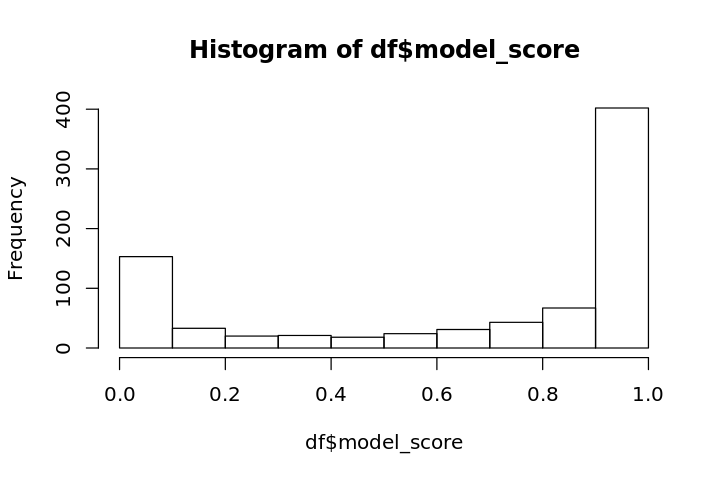

In [4]:
options(repr.plot.width=6, repr.plot.height=4)
hist(df$model_score)

In [5]:
# nrow(df)
df_fail = df[df$model_score < 0.2,]
# nrow(df_fail)
nrow(df_fail)/nrow(df)

[1] 0.229064

In [6]:
df = df
df_fail = df[df$model_score < 0.2,]
nrow(df_fail)/nrow(df)

[1] 0.229064

In [7]:
length(unique(df$short_donor))

[1] 540

[1] 271

[1] 0.6466818

[1] 0.7591738

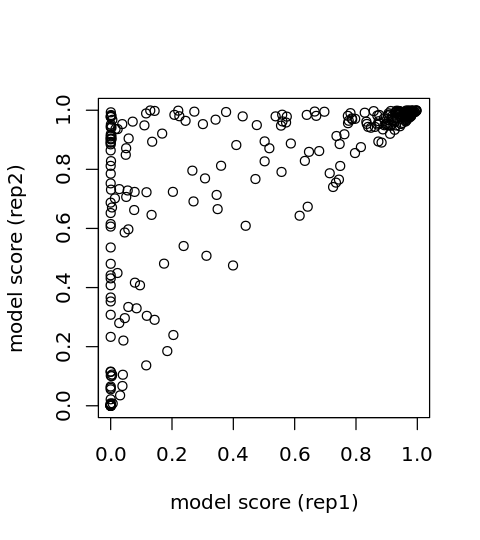

In [8]:
options(repr.plot.width=4, repr.plot.height=4.5)
x <- c()
y <- c()
for (i in 1:length(unique(df$short_donor))){
    donor = unique(df$short_donor)[i]
    if (nrow(df[df$short_donor == donor,]) >1){
        x = c(x,min(df[df$short_donor == donor,"model_score"]))
        y = c(y,max(df[df$short_donor == donor,"model_score"]))
    }
}
length(x)
cor(x,y)
cor(x,y,method = "spearman")
plot(x,y, xlab = "model score (rep1)", ylab = 'model score (rep2)', xlim = c(0,1), ylim= c(0,1))

In [60]:
failed_donors = unique(df_fail$short_donor)
df1 = df[df$short_donor %in% failed_donors,]
nrow(df1)

[1] 185

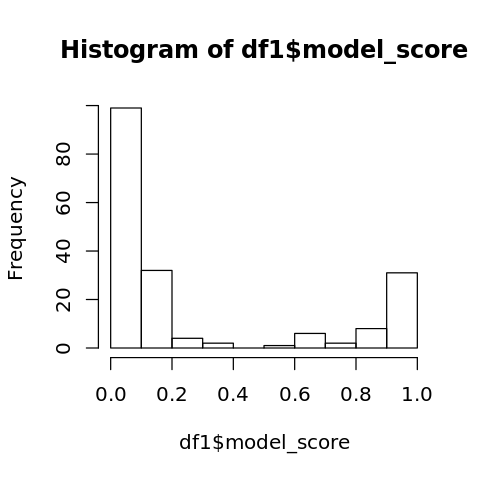

In [61]:
hist(df1$model_score)

[1] -0.5208376

[1] -0.2636826

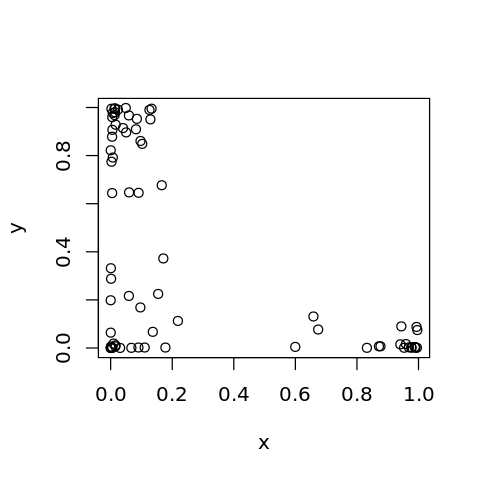

In [62]:
x <- c()
y <- c()
for (i in 1:length(unique(df1$short_donor))){
    donor = unique(df1$short_donor)[i]
    if (nrow(df1[df1$short_donor == donor,]) >1){
        x = c(x,df1[df1$short_donor == donor,"model_score"][1])
        y = c(y,df1[df1$short_donor == donor,"model_score"][2])
    }
}
cor(x,y)
cor(x,y,method = "spearman")
plot(x,y)

In [63]:
concordant_1 = c()
concordant_0 = c()
discordant = c()

In [64]:
for (i in 1:length(unique(df$short_donor))){
    donor = unique(df$short_donor)[i]
    r = df[df$short_donor == donor,]
    if (nrow(r)>2){
        print(donor)
    }
    if (nrow(r)==2){
        rep1 = r[r$short_donor == donor,"donor_id"][1]
        rep2 = r[r$short_donor == donor,"donor_id"][2]
        score1 = r[r$donor_id == rep1,"model_score"]
        score2 = r[r$donor_id == rep2,"model_score"]
        if (score1 > 0.5 & score2 > 0.5){
            concordant_1 = c(concordant_1,donor)
        }
        if (score1 <= 0.5 & score2 <= 0.5){
            concordant_0 = c(concordant_0,donor)
        }
        if ((score1 > 0.5 & score2 <= 0.5) | (score1 <= 0.5 & score2 > 0.5)){
            discordant = c(discordant,donor)
        }
    }
}

[1] "sohd"


In [65]:
length(concordant_0)
length(concordant_1)
length(discordant)

[1] 25

[1] 183

[1] 62

In [17]:
# bulk iPSC

In [18]:
#t_file = '/nfs/leia/research/stegle/dseaton/hipsci/proteomics_analysis/data/analysis/IPSc.ISR.featureCounts.genes.counts.unique.stranded.tsv_counts.HQ_TMM_TPM.tsv.gz'
t_file = '/hps/nobackup/hipsci/scratch/trans_eqtls/IPS_Bulk-RNA_Processing/Merged/IPS_Bulk-RNA_Processing/FullFreeze_Corrected_iPSC_20180506.txt.gz'

t_df = read.csv(t_file,sep='\t', row.names = 1)

In [19]:
head(t_df,2)

,X1191d5e0.9a2a.4ba4.b322.a591912160ee,X1b4ab422.05e5.4891.906e.12e9e9c65745,X217cd7ee.bfe8.4d37.b014.e47187901dbe,X6a50e9bf.8d92.4bac.98f0.50eee10d91d4,X896a9050.1423.490a.a12e.3db6217b49d3,a9cadef1.380e.4c4f.a33c.a828a58680e0,c3b0cf52.6a8d.4bba.ad6f.aca07b4ce145,HPSI0114i.bezi_1.hs37d5,HPSI0114i.bezi_3.hs37d5,HPSI0114i.eipl_1.hs37d5,...,SRR5589736,SRR5589737,SRR5589738,SRR5589739,SRR5589740,SRR5589741,SRR5589742,SRR5589743,SRR5589744,SRR5589745
ENSG00000223972,0.5344626,0.148611,0.000000,0.5858367,0.283967,0.1444611,0.3525601,0.2403484,0.1164022,0.1521228,...,0.2332243,0.7274514,0.000000,0.000000,0.00000,0.2645803,0.4455507,0.000000,0.4096429,0.7887012
ENSG00000227232,6.1188713,5.498526,5.530272,5.8288173,5.259845,5.6636704,5.6418591,5.9497365,5.8042281,5.9982958,...,5.7525242,5.7235908,5.965397,5.833703,5.84738,5.6856543,6.0737743,5.078349,5.8858752,5.3667701


In [20]:
new_cols = gsub('\\.','-',gsub('.hs37d5','',colnames(t_df)))

In [21]:
colnames(t_df) = new_cols
head(t_df,2)

,X1191d5e0-9a2a-4ba4-b322-a591912160ee,X1b4ab422-05e5-4891-906e-12e9e9c65745,X217cd7ee-bfe8-4d37-b014-e47187901dbe,X6a50e9bf-8d92-4bac-98f0-50eee10d91d4,X896a9050-1423-490a-a12e-3db6217b49d3,a9cadef1-380e-4c4f-a33c-a828a58680e0,c3b0cf52-6a8d-4bba-ad6f-aca07b4ce145,HPSI0114i-bezi_1,HPSI0114i-bezi_3,HPSI0114i-eipl_1,...,SRR5589736,SRR5589737,SRR5589738,SRR5589739,SRR5589740,SRR5589741,SRR5589742,SRR5589743,SRR5589744,SRR5589745
ENSG00000223972,0.5344626,0.148611,0.000000,0.5858367,0.283967,0.1444611,0.3525601,0.2403484,0.1164022,0.1521228,...,0.2332243,0.7274514,0.000000,0.000000,0.00000,0.2645803,0.4455507,0.000000,0.4096429,0.7887012
ENSG00000227232,6.1188713,5.498526,5.530272,5.8288173,5.259845,5.6636704,5.6418591,5.9497365,5.8042281,5.9982958,...,5.7525242,5.7235908,5.965397,5.833703,5.84738,5.6856543,6.0737743,5.078349,5.8858752,5.3667701


In [22]:
t_df = t_df[, grep('HPSI',colnames(t_df))]
head(t_df,2)
nrow(t_df)

,HPSI0114i-bezi_1,HPSI0114i-bezi_3,HPSI0114i-eipl_1,HPSI0114i-eipl_3,HPSI0114i-fikt_3,HPSI0114i-iisa_1,HPSI0114i-iisa_3,HPSI0114i-joxm_1,HPSI0114i-kolf_2,HPSI0114i-kolf_3,...,HPSI1213i-babk_2,HPSI1213i-foqj_2,HPSI1213i-hehd_1,HPSI1213i-hehd_2,HPSI1213i-nekd_1,HPSI1213i-pahc_4,HPSI1213i-pahc_5,HPSI1213i-tolg_4,HPSI1213i-tolg_6,HPSI1213i-xuja_2
ENSG00000223972,0.2403484,0.1164022,0.1521228,0.5431085,0.00000,0.6143799,0.346214,0.2556513,0.4662304,0.7333012,...,0.3188272,0.09838474,0.2364095,0.2464212,0.1670463,0.5254766,0.4030978,0.5636254,0.5362689,0.1287882
ENSG00000227232,5.9497365,5.8042281,5.9982958,6.1035282,5.31315,5.3678778,5.645318,5.9977255,5.6332916,6.2739845,...,5.7577560,6.03089424,5.5266274,5.6275444,5.8062306,6.2851530,5.7794632,5.3130083,5.6329879,6.2684811


[1] 56057

In [23]:
bulk_df = as.data.frame(t(t_df[c("ENSG00000171794","ENSG00000166863"),]))
colnames(bulk_df) = c('UTF1','TAC3')
bulk_df$donor_id = rownames(bulk_df)
head(bulk_df)

,UTF1,TAC3,donor_id
HPSI0114i-bezi_1,4.702476,5.564156,HPSI0114i-bezi_1
HPSI0114i-bezi_3,2.979417,5.493768,HPSI0114i-bezi_3
HPSI0114i-eipl_1,8.503246,3.347745,HPSI0114i-eipl_1
HPSI0114i-eipl_3,8.949141,4.493165,HPSI0114i-eipl_3
HPSI0114i-fikt_3,4.679852,5.328349,HPSI0114i-fikt_3
HPSI0114i-iisa_1,4.883805,5.763036,HPSI0114i-iisa_1


In [24]:
m_U = min(bulk_df$UTF1)
M_U = max(bulk_df$UTF1)
m_T = min(bulk_df$TAC3)
M_T = max(bulk_df$TAC3)

In [30]:
# library(dplyr)

In [68]:
head(df)
df$donor_diff_results = 'one_line_only'
df$donor_diff_results[df$short_donor %in% concordant_1] = 'concordant_1'
df$donor_diff_results[df$short_donor %in% concordant_0] = 'concordant_0'
df$donor_diff_results[df$short_donor %in% discordant] = 'discordant'
df[df$short_donor == 'sohd',"donor_diff_results"] = 'concordant_1'
head(df)

donor_id,diff_efficiency,model_score,short_donor,donor_diff_results
HPSI0114i-bezi_1,not_assessed,0.96380960,bezi,concordant_1
HPSI0114i-bezi_3,succeeded,0.98836915,bezi,concordant_1
HPSI0114i-eipl_1,failed,0.01549609,eipl,concordant_0
HPSI0114i-eipl_3,not_assessed,0.00705412,eipl,concordant_0
HPSI0114i-fikt_3,succeeded,0.97993957,fikt,one_line_only
HPSI0114i-iisa_1,not_assessed,0.73531860,iisa,concordant_1


donor_id,diff_efficiency,model_score,short_donor,donor_diff_results
HPSI0114i-bezi_1,not_assessed,0.96380960,bezi,concordant_1
HPSI0114i-bezi_3,succeeded,0.98836915,bezi,concordant_1
HPSI0114i-eipl_1,failed,0.01549609,eipl,concordant_0
HPSI0114i-eipl_3,not_assessed,0.00705412,eipl,concordant_0
HPSI0114i-fikt_3,succeeded,0.97993957,fikt,one_line_only
HPSI0114i-iisa_1,not_assessed,0.73531860,iisa,concordant_1


In [69]:
write.csv(df, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/diff_efficiency/predicted_diff_efficiency_hipsci_lines_including_concordant_discordant_info.csv",
         row.names = F, quote = F)

In [27]:
df_00 = df[df$short_donor %in% concordant_0,]
df_00$rep = 'rep1'
df_00[seq(2,nrow(df_00),2),'rep'] = 'rep2'
# head(df_00,2)

df0 = inner_join(df_00, bulk_df, by = "donor_id")
head(df0,2)

Warning message:
“Column `donor_id` joining factor and character vector, coercing into character vector”

donor_id,diff_efficiency,model_score,short_donor,rep,UTF1,TAC3
HPSI0114i-eipl_1,failed,0.01549609,eipl,rep1,8.503246,3.347745
HPSI0114i-eipl_3,not_assessed,0.00705412,eipl,rep2,8.949141,4.493165


In [28]:
unique(df_00$short_donor)

[1] "eipl" "kozf" "oilg" "eoko" "ceik" "oikd" "aicq" "jepf" "jory" "suqd"
[11] "oomz" "ciwj" "lipl" "lirf" "voce" "rily" "burb" "oatm" "kije" "uixy"
[21] "lise" "hikt" "moyn" "jufd" "bilx"

In [29]:
df_11 = df[df$short_donor %in% concordant_1,]
df_11$rep = 'rep1'
df_11[seq(2,nrow(df_11),2),'rep'] = 'rep2'
# head(df_00,2)

df1 = inner_join(df_11, bulk_df, by = "donor_id")
head(df1,2)

Warning message:
“Column `donor_id` joining factor and character vector, coercing into character vector”

donor_id,diff_efficiency,model_score,short_donor,rep,UTF1,TAC3
HPSI0114i-bezi_1,not_assessed,0.9638096,bezi,rep1,4.702476,5.564156
HPSI0114i-bezi_3,succeeded,0.9883692,bezi,rep2,2.979417,5.493768


In [32]:
df_01 = df[df$short_donor %in% discordant,]
df_01$rep = 'rep1'
for (donor in unique(df_01$short_donor)){
    r = df_01[df_01$short_donor == donor,]
#     print(head(r))
    df_01[df_01$short_donor == donor & df_01$model_score == min(r$model_score),'rep'] = 'rep1'
    df_01[df_01$short_donor == donor & df_01$model_score == max(r$model_score),'rep'] = 'rep2'
}
# head(df_01)
df01 = inner_join(df_01, bulk_df, by = "donor_id")
head(df01,2)

Warning message:
“Column `donor_id` joining factor and character vector, coercing into character vector”

donor_id,diff_efficiency,model_score,short_donor,rep,UTF1,TAC3
HPSI0115i-aion_2,succeeded,0.990376984,aion,rep2,6.565273,4.743942
HPSI0115i-aion_3,not_assessed,0.001997897,aion,rep1,9.488479,2.133053


In [33]:
unique(df_01$short_donor)

[1] "aion" "bimq" "iinu" "qaqp" "xaka" "feec" "romx" "aiid" "dewh" "vieg"
[11] "xanu" "bubh" "cuhk" "sojd" "xugn" "muwv" "vats" "eevy" "oaqd" "iooi"
[21] "ourj" "ruah" "xegx" "fiaj" "qajt" "wiii" "hapz" "iool" "iuoc" "oadp"
[31] "oazw" "pews" "raet" "vebd" "zukb" "miaj" "paab" "puhk" "uevq" "voxu"
[41] "biln" "uegn" "keui" "kute" "nufh" "tosj" "xiry" "siqu" "oexh" "qehq"
[51] "tifo" "vajy" "vorn" "zipi" "wuye" "tuju" "geve" "mebq" "wakr" "wiau"
[61] "yiek" "pahc"

In [93]:
library(ggthemes)
mypalette = "Primary colors with a vibrant twist"


Attaching package: ‘ggthemes’

The following object is masked from ‘package:cowplot’:

    theme_map



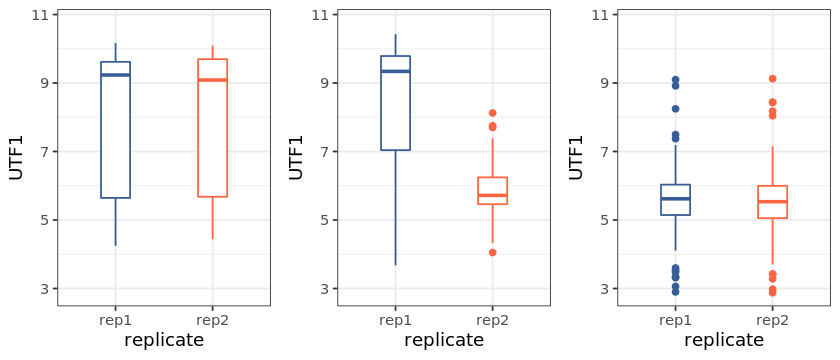

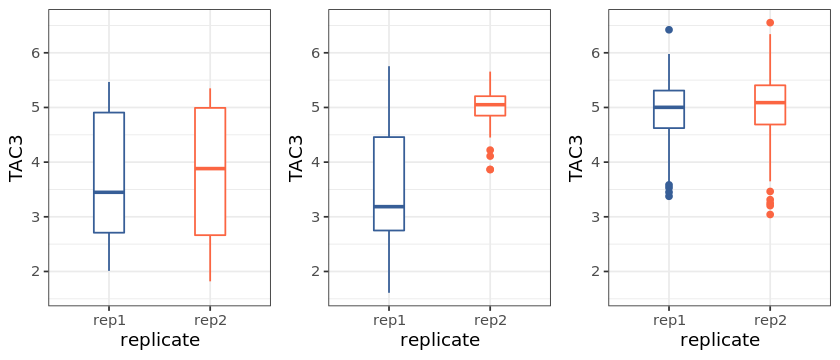

In [100]:
options(repr.plot.width=7, repr.plot.height=3)
p1 = ggplot(df0, aes(x = rep, y = UTF1, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_U,M_U)) + 
    scale_color_canva(palette = mypalette) + xlab("replicate") + theme_bw() + theme(legend.position = "none") 
p2 = ggplot(df01, aes(x = rep, y = UTF1, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_U,M_U)) + 
    scale_color_canva(palette = mypalette) + xlab("replicate") + theme_bw() + theme(legend.position = "none") 
p3 = ggplot(df1, aes(x = rep, y = UTF1, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_U,M_U)) + 
    scale_color_canva(palette = mypalette) + xlab("replicate") + theme_bw() + theme(legend.position = "none") 
plot_grid(p1,p2,p3, ncol = 3)

p1 = ggplot(df0, aes(x = rep, y = TAC3, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_T,M_T)) + 
    scale_color_canva(palette = mypalette) + xlab("replicate") + theme_bw() + theme(legend.position = "none") 
p2 = ggplot(df01, aes(x = rep, y = TAC3, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_T,M_T)) + 
    scale_color_canva(palette = mypalette) + xlab("replicate") + theme_bw() + theme(legend.position = "none") 
p3 = ggplot(df1, aes(x = rep, y = TAC3, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_T,M_T)) + 
    scale_color_canva(palette = mypalette) + xlab("replicate") + theme_bw() + theme(legend.position = "none") 
plot_grid(p1,p2,p3, ncol = 3)

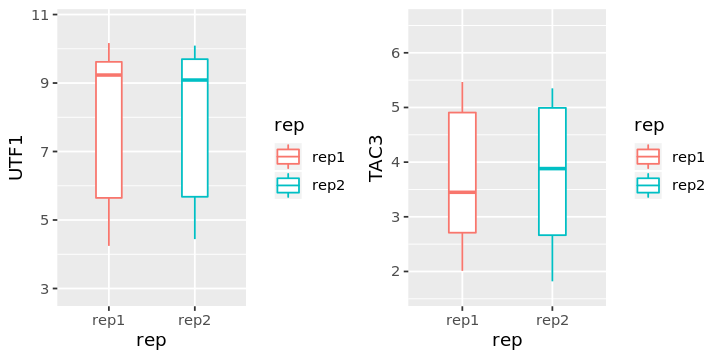

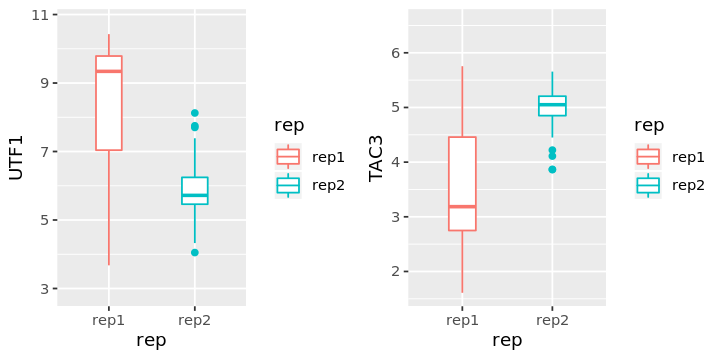

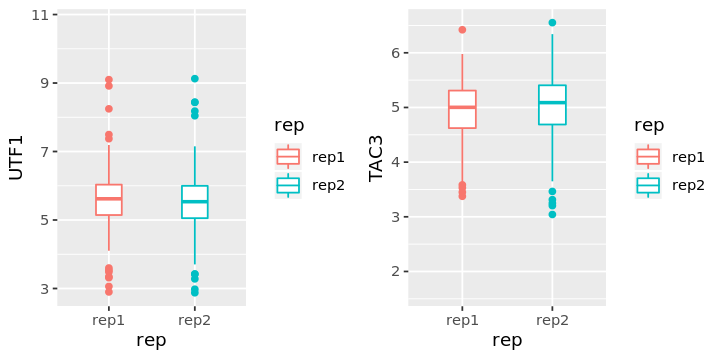

In [72]:
options(repr.plot.width=6, repr.plot.height=3)
p1 = ggplot(df0, aes(x = rep, y = UTF1, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_U,M_U))
p2 = ggplot(df0, aes(x = rep, y = TAC3, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_T,M_T))
plot_grid(p1,p2, ncol = 2)

p1 = ggplot(df01, aes(x = rep, y = UTF1, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_U,M_U))
p2 = ggplot(df01, aes(x = rep, y = TAC3, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_T,M_T))
plot_grid(p1,p2, ncol = 2)

p1 = ggplot(df1, aes(x = rep, y = UTF1, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_U,M_U))
p2 = ggplot(df1, aes(x = rep, y = TAC3, colour = rep)) + geom_boxplot(width = 0.3) + ylim(c(m_T,M_T))
plot_grid(p1,p2, ncol = 2)

In [54]:
# library(dplyr)
library(cowplot)
# library(ggplot2)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [35]:
df0 = inner_join(df, bulk_df, by = "donor_id")
head(df0)

Warning message:
“Column `donor_id` joining factor and character vector, coercing into character vector”

donor_id,diff_efficiency,model_score,short_donor,UTF1,TAC3
HPSI0114i-bezi_1,not_assessed,0.96380960,bezi,4.702476,5.564156
HPSI0114i-bezi_3,succeeded,0.98836915,bezi,2.979417,5.493768
HPSI0114i-eipl_1,failed,0.01549609,eipl,8.503246,3.347745
HPSI0114i-eipl_3,not_assessed,0.00705412,eipl,8.949141,4.493165
HPSI0114i-fikt_3,succeeded,0.97993957,fikt,4.679852,5.328349
HPSI0114i-iisa_1,not_assessed,0.73531860,iisa,4.883805,5.763036


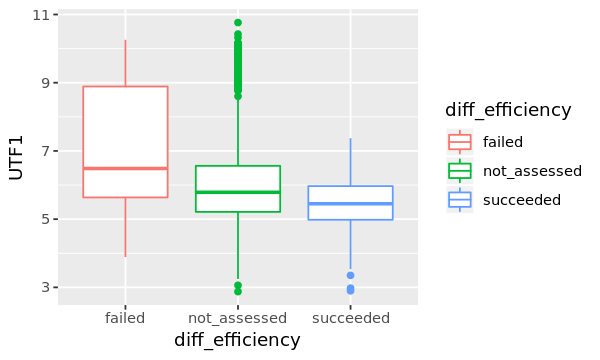

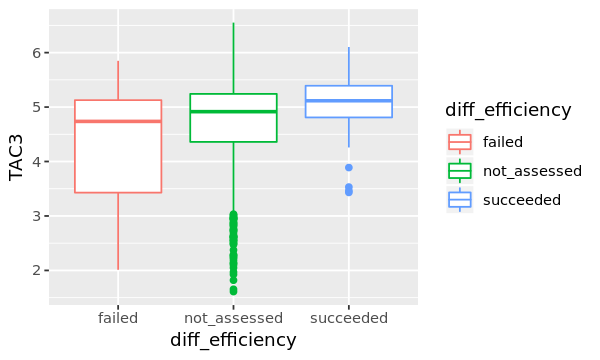

In [42]:
options(repr.plot.width=5, repr.plot.height=3)
ggplot(df0, aes(x = diff_efficiency, y = UTF1, colour = diff_efficiency)) + geom_boxplot()
ggplot(df0, aes(x = diff_efficiency, y = TAC3, colour = diff_efficiency)) + geom_boxplot()

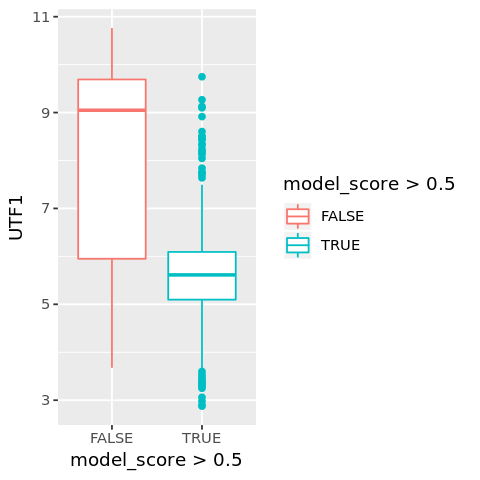

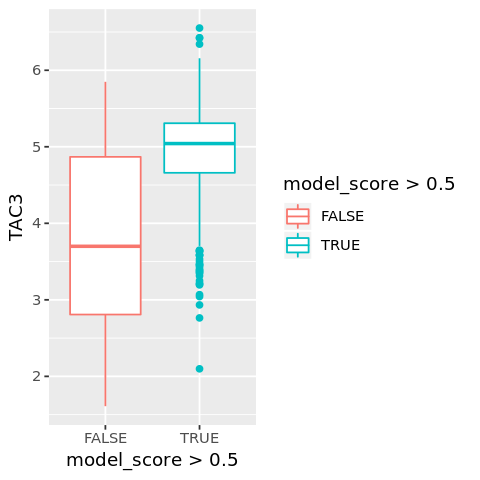

In [37]:
ggplot(df0, aes(x = model_score>0.5, y = UTF1, colour = model_score>0.5)) + geom_boxplot()
ggplot(df0, aes(x = model_score>0.5, y = TAC3, colour = model_score>0.5)) + geom_boxplot()

In [36]:
df = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/diff_efficiency/predicted_diff_efficiency_hipsci_lines_including_concordant_discordant_info.csv")
head(df)

donor_id,diff_efficiency,model_score,short_donor,donor_diff_results
HPSI0114i-bezi_1,not_assessed,0.96380960,bezi,concordant_1
HPSI0114i-bezi_3,succeeded,0.98836915,bezi,concordant_1
HPSI0114i-eipl_1,failed,0.01549609,eipl,concordant_0
HPSI0114i-eipl_3,not_assessed,0.00705412,eipl,concordant_0
HPSI0114i-fikt_3,succeeded,0.97993957,fikt,one_line_only
HPSI0114i-iisa_1,not_assessed,0.73531860,iisa,concordant_1


In [37]:
nrow(df[df$model_score < 0.2,])/nrow(df)

[1] 0.16133

In [38]:
chisq.test(x = c(183,62,25), y = c(0.7,0.27,0.03))

Warning message in chisq.test(x = c(183, 62, 25), y = c(0.7, 0.27, 0.03)):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  c(183, 62, 25) and c(0.7, 0.27, 0.03)
X-squared = 6, df = 4, p-value = 0.1991


In [39]:
df0 = df[df$donor_diff_results != "one_line_only",]
nrow(df0)

[1] 543

In [40]:
df1 = df[df$donor_diff_results == "one_line_only",]
nrow(df1)

[1] 269

In [41]:
nrow(df1[df1$model_score < 0.2,])/nrow(df1)

[1] 0.1524164

In [42]:
chisq.test(x = c(183,62,25), y = c(0.72,0.17,0.023))

Warning message in chisq.test(x = c(183, 62, 25), y = c(0.72, 0.17, 0.023)):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  c(183, 62, 25) and c(0.72, 0.17, 0.023)
X-squared = 6, df = 4, p-value = 0.1991


In [4]:
?fisher.test

In [6]:
x = matrix(c(14,1,0,1),nrow=2)
x

14,0
1,1


In [9]:
fisher.test(x, alternative="less")


	Fisher's Exact Test for Count Data

data:  x
p-value = 1
alternative hypothesis: true odds ratio is less than 1
95 percent confidence interval:
   0 Inf
sample estimates:
odds ratio 
       Inf 
